## Imports for project

In [404]:
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## Import data from csv

In [216]:
data = pd.read_csv('all_stocks_5yr.csv')

## Data Encoding

In [217]:
#cut off year
data['date'] = data['date'].astype(str).str[:-5]
#Encode data for Date and Name
le = preprocessing.LabelEncoder()
#print(data.sort_values(["date"]))
data["date"] = le.fit_transform(data["date"])
data["Name"] = le.fit_transform(data["Name"])
#print(data.sort_values(["date"]))



        date     open     high       low    close     volume  Name
31455   1/10  135.110  135.250  132.2900  132.960     884639   ALB
380106  1/10   81.950   82.120   81.0400   81.160    2568116   MMC
16599   1/10   36.170   36.660   35.9850   36.520    2106624   AEE
520794  1/10   67.130   68.620   66.9500   67.700    3274506   STI
273673  1/10   48.190   48.760   48.0300   48.430    2486702   HIG
31707   1/10   60.430   61.440   59.8710   60.710     568493  ALGN
404987  1/10   80.400   81.380   80.1400   81.230     929548  NDAQ
334782  1/10   56.800   59.320   56.7500   58.840    4471128   KSS
311465  1/10  128.430  128.930  127.6800  128.160     289360    IT
95805   1/10   37.330   37.430   36.6050   36.830    2773864   CAG
550387  1/10   53.310   53.760   52.9800   53.080    1096789   TSS
479247  1/10  368.650  371.420  365.6000  366.460     805844  REGN
163857  1/10   94.230   95.220   93.9200   94.780    1469078    DG
567470  1/10  128.520  130.460  128.4900  129.790    2927883  

## Data Normalization

In [74]:
#data['date'] = data["date"].astype(np.float64)
#data['volume'] = data["volume"].astype(np.float64)
#data['Name'] = data["Name"].astype(np.float64)
#print(data.info())
#print("start---")
#count =0
#for i in data:
#    if data.loc[[count]].isnull().values.any():
#        print(data.loc[[count]])    
#    count += 1
#print("done---")
#data_norm = preprocessing.normalize(data,norm="l2")
#print(data_norm)

## Cluster Data on dates

In [171]:
cdata = data.copy()
dates = list(range(0,363))
first2 = True
#col = ['date','open','high','low','close','volume','Name']
#dates2 = pd.DataFrame(columns=col)
#loop through all unique days present
for day in dates:
    #loop though and compare for all matching days and add to list
    first = True
    for i in range(cdata.__len__()):
        if cdata.iloc[i,0] == day:
            if first == True:
                #print(pd.DataFrame(cdata.iloc[[i]]))
                dates2 = pd.DataFrame(cdata.iloc[[i]])
                #print(dates2)
                first = False
            else:    
                dates2 = dates2.append(pd.DataFrame(cdata.iloc[[i]]))
    #take mean of list
    if first2 == True:
        series = dates2.mean(axis=0)
        df = pd.DataFrame(series).transpose()
        #print(type(df))
        #print(df)
        average = pd.DataFrame(df)
        #print(average)
        first2 = False
    else:
        #print(type(average))
        series = dates2.mean(axis=0)
        df = pd.DataFrame(series).transpose()
        average = average.append(pd.DataFrame(df))
   #if day==3:
        #print(type(dates2))
        #print(dates2)
        #break


## Create DF of averages

In [374]:
#type(average)
means = average.copy()
#might have to add back after re-running the clustering
#means.transpose()
#print(test)

## Calculate 5 year avg of S&P500

In [375]:
avg = means.copy()
#print(avg)
avg = avg.drop(['date', 'volume','Name'], axis=1)
#print(avg)
avg = avg.mean(axis=0)
avg = pd.DataFrame(avg).transpose()
#print(avg)
#avg = avg.append(pd.DataFrame(df))

## Create response DF

In [376]:
response = means.copy()
response = response.drop(['date', 'volume','Name'], axis=1)
response.reset_index(inplace=True)
response = response.drop(['index'],axis=1)
#print(response)
actions = []
for index, row in response.iterrows():
    #print(row['open'])
    if (row['open'] > avg.loc[0]['open']) and (row['high'] > avg.iloc[0]['high']) and (row['low'] > avg.iloc[0]['low']) and (row['close'] > avg.iloc[0]['close']):
        actions.append("sell")
    elif (row['open'] < avg.loc[0]['open']) and (row['high'] < avg.iloc[0]['high']) and (row['low'] < avg.iloc[0]['low']) and (row['close'] < avg.iloc[0]['close']):
        actions.append("buy")
    else:
        actions.append("pass")
#print(actions)
response['actions'] = actions
#response = response.drop(['open', 'high','low','close'], axis=1)
#print(response)

## Split Dataset

In [377]:
trainingset = response.copy()

training = pd.DataFrame(trainingset.sample(frac=0.8,replace=False))
test = pd.DataFrame(pd.concat([trainingset,training]).drop_duplicates(keep=False))

## Logistic Regression

In [396]:
logReg = LogisticRegression()
logReg.fit(training[['open','high','low','close']],training['actions'])
pred = logReg.predict(test[['open','high','low','close']])
cf_matrix = confusion_matrix(test['actions'], pred)
#Buy,pass,sell x buy,pass,sell
#print(cf_matrix)

## Validate Output

In [387]:
logReg.score(test[['open','high','low','close']],test['actions'])

0.76388888888888884

## Vizualization

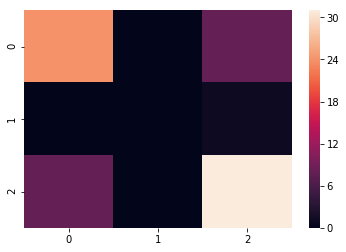

In [406]:
sns.heatmap(cf_matrix)
plt.show()